In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

X, y = load_iris(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)


In [73]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Number of mislabeled points out of a total %d points: %d" %(X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points: 4


In [74]:
# summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      1.00      0.94        30
           2       1.00      0.83      0.91        24

    accuracy                           0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75

[[21  0  0]
 [ 0 30  0]
 [ 0  4 20]]
0.9466666666666667


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.00      0.00      0.00        30
           2       0.44      1.00      0.62        24

    accuracy                           0.60        75
   macro avg       0.48      0.67      0.54        75
weighted avg       0.42      0.60      0.48        75

[[21  0  0]
 [ 0  0 30]
 [ 0  0 24]]
accuracy is 0.6


/home/kalilinux/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.28      1.00      0.44        21
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        24

    accuracy                           0.28        75
   macro avg       0.09      0.33      0.15        75
weighted avg       0.08      0.28      0.12        75

[[21  0  0]
 [30  0  0]
 [24  0  0]]
accuracy is 0.28


/home/kalilinux/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.00      0.00      0.00        30
           2       0.44      1.00      0.62        24

    accuracy                           0.60        75
   macro avg       0.48      0.67      0.54        75
weighted avg       0.42      0.60      0.48        75

[[21  0  0]
 [ 0  0 30]
 [ 0  0 24]]
accuracy is 0.6


/home/kalilinux/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
****Results****
Accuracy: 94.6667%
MultinomialNB
****Results****
Accuracy: 60.0000%
BernoulliNB
****Results****
Accuracy: 28.0000%
ComplementNB
****Results****
Accuracy: 60.0000%


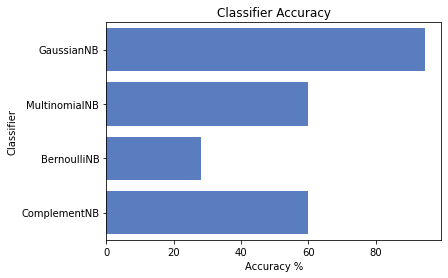

In [79]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
 
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()